___
# PROJETO 1

## <font color='red'>Vinicius Bonelli Falco, 2B</font>
___

## <font color='blue'>Aposentados trabalhando?</font>

## Introdução

É um fato conhecido que muitas pessoas mesmo depois de se aposentar se mantém no mercado de trabalho, seja por necessidade, seja por vontade. Certas pessoas necessitam do dinheiro extra que elas ganham com o trabalho pois só a aposentadoria não dá conta. Entretanto isso sobrecarrega o sistema de previdencia do governo, como mostra esse artigo: http://jconline.ne10.uol.com.br/canal/economia/pernambuco/noticia/2016/05/15/gasto-com-a-previdencia-social-cresce-em-ritmo-acelerado-e-compromete-economia-235809.php. Tendo isso em vista escolhi variáveis que nos permitem ver o crescimento do número de aposentados desde 1992, o tempo que esses aposentados contribuiram para 




___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Vinicius Bonelli\Desktop


In [3]:
#Leitura da base já em formato de DataFrame e extensão .csv
pnad2014 = pd.read_csv('PES2014.csv', sep=',')
pnad2001 = pd.read_csv('PES2001.csv', sep=',')
pnad1992 = pd.read_csv('PES1992.csv', sep=',')

n = pnad2014.shape[0]


In [4]:
#definindo as variaveis
pnad1992["Trabalhou"] = pnad1992.v9001
pnad1992["Aposentado"] = pnad1992.v9122

pnad2001["Trabalhou"] = pnad2001.v9001
pnad2001["Aposentado"] = pnad2001.v9122

pnad2014["Região"] = pnad2014.UF
pnad2014["Sexo"] = pnad2014.V0302
pnad2014["Idade"] = pnad2014.V8005
pnad2014["Trabalhou"] = pnad2014.V9001
pnad2014["Contribuinte"] = pnad2014.V9059
pnad2014["Idade_começou_trabalhar"] = pnad2014.V9892
pnad2014["Aposentado"] = pnad2014.V9122
pnad2014["Rendimento_per_Capita"] = pnad2014.V4743


In [5]:
#categorizando as variaveis


pnad2014.Região[(pnad2014.UF >= 40) & (pnad2014.UF < 50)] = 1
pnad2014.Região[(pnad2014.UF >= 30) & (pnad2014.UF < 40)] = 2 
pnad2014.Região[(pnad2014.UF >= 50) & (pnad2014.UF < 60)] = 3
pnad2014.Região[(pnad2014.UF >= 20) & (pnad2014.UF < 30)] = 4
pnad2014.Região[(pnad2014.UF >= 10) & (pnad2014.UF < 20)] = 5
pnad2014.Região = pnad2014.Região.astype('category')
pnad2014.Região.cat.categories = ('Sul', 'Sudeste', 'Centro-Oeste', 'Nordeste', 'Norte')

pnad2014.Sexo = pnad2014.Sexo.astype('category')
pnad2014.Sexo.cat.categories = ('Homem', 'Mulher')

pnad2014.Idade = pnad2014.Idade.astype('float')

pnad2014.Trabalhou = pnad2014.Trabalhou.astype('category')
pnad2014.Trabalhou.cat.categories = ('Sim', 'Não')

pnad2014.Contribuinte = pnad2014.Contribuinte.astype('category')
pnad2014.Contribuinte.cat.categories = ('Sim', 'Não')

pnad2014.Idade_começou_trabalhar = pnad2014.Idade_começou_trabalhar.astype('float')

pnad2014.Aposentado = pnad2014.Aposentado.astype('category')
pnad2014.Aposentado.cat.categories = ('Sim', 'Não')

pnad2014.Rendimento_per_Capita = pnad2014.Rendimento_per_Capita.astype('float')

pnad1992.Trabalhou = pnad1992.Trabalhou.astype('category')
pnad1992.Trabalhou.cat.categories = ('Parte Ignorada', 'Sim', 'Não')

pnad1992.Aposentado = pnad1992.Aposentado.astype('category')
pnad1992.Aposentado.cat.categories = ('Sim', 'Não')

pnad2001.Trabalhou = pnad2001.Trabalhou.astype('category')
pnad2001.Trabalhou.cat.categories = ('Parte Ignorada', 'Sim', 'Não')

pnad2001.Aposentado = pnad2001.Aposentado.astype('category')
pnad2001.Aposentado.cat.categories = ('Ignorado', 'Sim', 'Não')

C:\Users\Vinicius Bonelli\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Vinicius Bonelli\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Vinicius Bonelli\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Vinicius Bonelli\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying

Frequências relativas por região:
Sudeste         29.4
Nordeste        28.9
Norte           16.0
Sul             15.3
Centro-Oeste    10.4
dtype: float64 



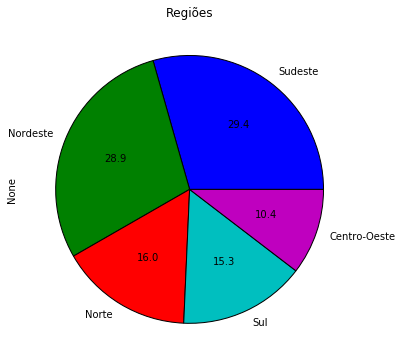

In [6]:
#graficos e tabelas iniciais das regioes
print('Frequências relativas por região:')
frequencia_regiao = (pnad2014.Região.value_counts()/n*100).round(decimals=1)
print(frequencia_regiao,'\n')
pizza_regiao = frequencia_regiao.plot(kind='pie',title='Regiões',autopct='%.1f',figsize=(6, 6))

Frequências relativas por sexo:
Mulher    51.5
Homem     48.5
dtype: float64 



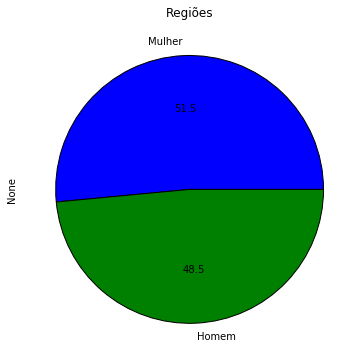

In [7]:
#graficos e tabelas iniciais dos sexos
print('Frequências relativas por sexo:')
frequencia_sexo = (pnad2014.Sexo.value_counts()/n*100).round(decimals=1)
print(frequencia_sexo,'\n')
pizza_sexo = frequencia_sexo.plot(kind='pie',title='Regiões',autopct='%.1f',figsize=(6, 6))

Frequências relativas por idade:
(10, 20]      16.9
(20, 30]      15.7
(30, 40]      15.6
(0, 10]       14.2
(40, 50]      13.4
(50, 60]      10.7
(60, 70]       6.9
(70, 80]       3.6
(80, 90]       1.3
(90, 100]      0.2
(100, 110]     0.0
dtype: float64 



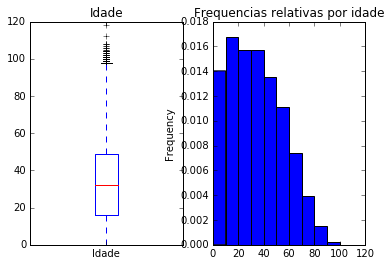

In [8]:
#graficos e tabelas iniciais das idades
faixa_idade = range(0,120,10)
corte_idade = pd.cut(pnad2014.Idade, faixa_idade)
print('Frequências relativas por idade:')
frequencia_idade = (corte_idade.value_counts()/n*100).round(decimals=1)
print(frequencia_idade,'\n')

fig, axs = plt.subplots(1,2)

boxplot_idade = pnad2014.Idade.plot.box(ax = axs[0], title = 'Idade')

histograma_idade = pnad2014.Idade.plot.hist(bins = faixa_idade, normed = 1, ax = axs[1], title = 'Frequencias relativas por idade')






Frequências relativas por situacao no trabalho:
Sim               36.5
Não               31.5
Parte Ignorada     0.0
dtype: float64 



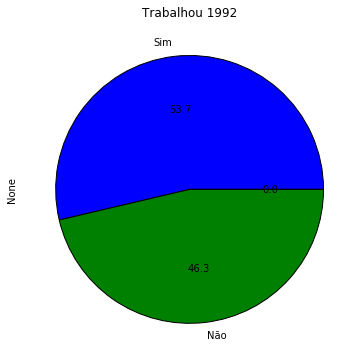

In [53]:
#graficos e tabelas iniciais da situacao no trabalho
print('Frequências relativas por situacao no trabalho:')
frequencia_trabalho1992 = (pnad1992.Trabalhou.value_counts()/n*100).round(decimals=1)
print(frequencia_trabalho1992,'\n')
pizza_trabalho = frequencia_trabalho1992.plot(kind='pie',title='Trabalhou 1992',autopct='%.1f',figsize=(6, 6))

Frequências relativas por situacao no trabalho:
Não               50.5
Sim               44.1
Parte Ignorada     0.0
dtype: float64 



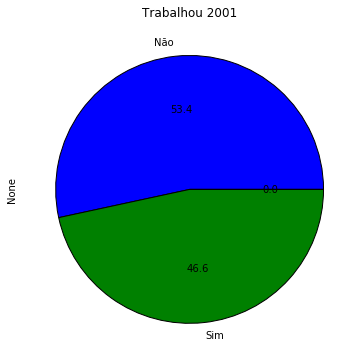

In [52]:
#graficos e tabelas iniciais da situacao no trabalho
print('Frequências relativas por situacao no trabalho:')
frequencia_trabalho2001 = (pnad2001.Trabalhou.value_counts()/n*100).round(decimals=1)
print(frequencia_trabalho2001,'\n')
pizza_trabalho = frequencia_trabalho2001.plot(kind='pie',title='Trabalhou 2001',autopct='%.1f',figsize=(6, 6))

Frequências relativas por situacao no trabalho:
Sim    46.5
Não    39.5
dtype: float64 



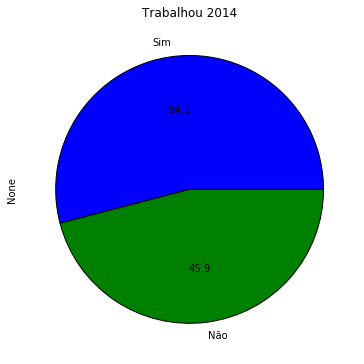

In [49]:
#graficos e tabelas iniciais da situacao no trabalho
print('Frequências relativas por situacao no trabalho:')
frequencia_trabalho = (pnad2014.Trabalhou.value_counts()/n*100).round(decimals=1)
print(frequencia_trabalho,'\n')
pizza_trabalho = frequencia_trabalho.plot(kind='pie',title='Trabalhou 2014',autopct='%.1f',figsize=(6, 6))

Frequências relativas por contribuintes:
Sim    29.3
Não    19.4
dtype: float64 



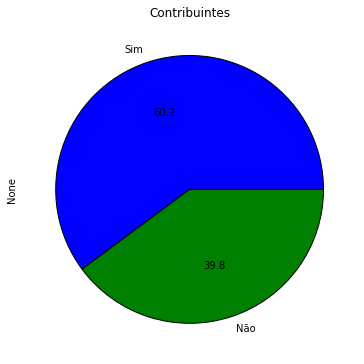

In [10]:
#graficos e tabelas iniciais dos constribuintes
print('Frequências relativas por contribuintes:')
frequencia_contribuintes = (pnad2014.Contribuinte.value_counts()/n*100).round(decimals=1)
print(frequencia_contribuintes,'\n')
pizza_contribuintes = frequencia_contribuintes.plot(kind='pie',title='Contribuintes',autopct='%.1f',figsize=(6, 6))

Frequências relativas por idade comecou a trabalhar:
(15, 20]    20.2
(10, 15]    19.5
(5, 10]      9.0
(20, 25]     2.7
(25, 30]     0.6
(0, 5]       0.2
(30, 35]     0.2
dtype: float64 



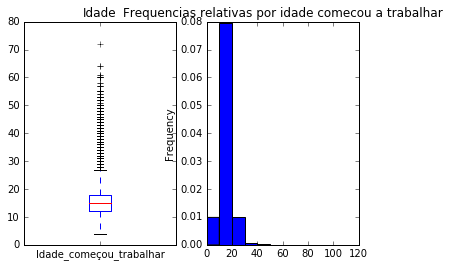

In [11]:
#graficos e tabelas iniciais das idades comecou a trabalhar
faixa_idade_trabalho = range(0,40,5)
corte_idade_trabalho = pd.cut(pnad2014.Idade_começou_trabalhar, faixa_idade_trabalho)
print('Frequências relativas por idade comecou a trabalhar:')
frequencia_idade_trabalho = (corte_idade_trabalho.value_counts()/n*100).round(decimals=1)
print(frequencia_idade_trabalho,'\n')

fig, axs = plt.subplots(1,2)

boxplot_idade_trabalho = pnad2014.Idade_começou_trabalhar.plot.box(ax = axs[0], title = 'Idade')

histograma_idade_trabaho = pnad2014.Idade_começou_trabalhar.plot.hist(bins = faixa_idade, normed = 1, ax = axs[1], title = 'Frequencias relativas por idade comecou a trabalhar')

Frequências relativas por aposentados:
Não    62.8
Sim     5.2
dtype: float64 



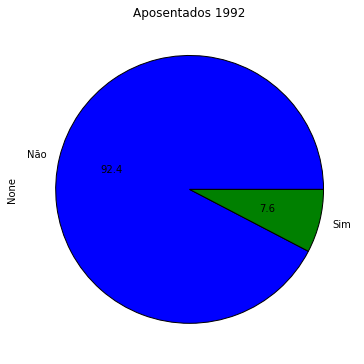

In [54]:
#graficos e tabelas iniciais dos aposentados
print('Frequências relativas por aposentados:')
frequencia_aposentados1992 = (pnad1992.Aposentado.value_counts()/n*100).round(decimals=1)
print(frequencia_aposentados1992,'\n')
pizza_aposentados = frequencia_aposentados1992.plot(kind='pie',title='Aposentados 1992',autopct='%.1f',figsize=(6, 6))

Frequências relativas por aposentados:
Não         86.4
Sim          8.3
Ignorado     0.0
dtype: float64 



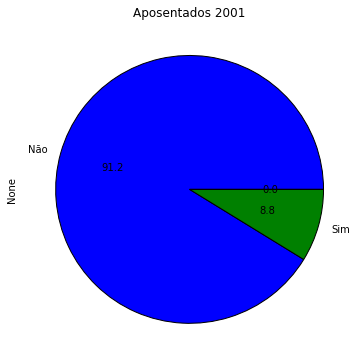

In [11]:
#graficos e tabelas iniciais dos aposentados
print('Frequências relativas por aposentados:')
frequencia_aposentados2001 = (pnad2001.Aposentado.value_counts()/n*100).round(decimals=1)
print(frequencia_aposentados2001,'\n')
pizza_aposentados = frequencia_aposentados2001.plot(kind='pie',title='Aposentados 2001',autopct='%.1f',figsize=(6, 6))

Frequências relativas por aposentados:
Não    75.3
Sim    10.7
dtype: float64 



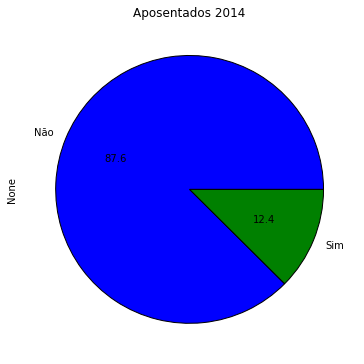

In [6]:
#graficos e tabelas iniciais dos aposentados
print('Frequências relativas por aposentados:')
frequencia_aposentados = (pnad2014.Aposentado.value_counts()/n*100).round(decimals=1)
print(frequencia_aposentados,'\n')
pizza_aposentados = frequencia_aposentados.plot(kind='pie',title='Aposentados 2014',autopct='%.1f',figsize=(6, 6))

Frequências relativas por rendimento:
(0, 880]    99.4
dtype: float64 



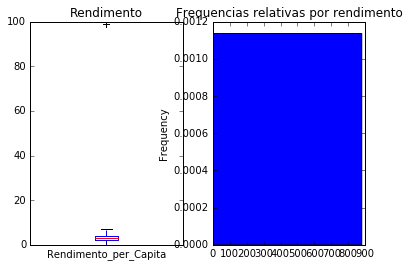

In [7]:
#graficos e tabelas iniciais do rendimento per capita
faixa_rendimento = range(0,1760,880)
corte_rendimento = pd.cut(pnad2014.Rendimento_per_Capita, faixa_rendimento)
print('Frequências relativas por rendimento:')
frequencia_rendimento = (corte_rendimento.value_counts()/n*100).round(decimals=1)
print(frequencia_rendimento,'\n')

fig, axs = plt.subplots(1,2)

boxplot_rendimento = pnad2014.Rendimento_per_Capita.plot.box(ax = axs[0], title = 'Rendimento')

histograma_rendimento = pnad2014.Rendimento_per_Capita.plot.hist(bins = faixa_rendimento, normed = 1, ax = axs[1], title = 'Frequencias relativas por rendimento')

In [10]:
#crosstab entre aposentados que trabalham
print('Tabela Cruzada Aposentados vs Trabalhadores (1992):')
crosstab_1992 = pd.crosstab(pnad1992.Aposentado,pnad1992.Trabalhou,margins=True,rownames=['Aposentados'], colnames=['Trabalhou'])
print(crosstab_1992)

Tabela Cruzada Aposentados vs Trabalhadores (1992):
Trabalhou    Parte Ignorada     Sim     Não     All
Aposentados                                        
Sim                       0    4768   14246   19014
Não                       0  127748  100162  227910
All                     166  132516  114408  317355


In [8]:
#crosstab entre aposentados que trabalham
print('Tabela Cruzada Aposentados vs Trabalhadores (2001):')
crosstab_2001 = pd.crosstab(pnad2001.Aposentado,pnad2001.Trabalhou,margins=True,rownames=['Aposentados'], colnames=['Trabalhou'])
print(crosstab_2001)

Tabela Cruzada Aposentados vs Trabalhadores (2001):
Trabalhou    Parte Ignorada     Sim     Não     All
Aposentados                                        
Ignorado                  0       2       2       5
Sim                       0    7686   22289   29975
Não                       0  152401  160845  313246
All                      42  160094  183146  378843


In [9]:
#crosstab entre aposentados que trabalham
print('Tabela Cruzada Aposentados vs Trabalhadores (2014):')
crosstab_1 = pd.crosstab(pnad2014.Aposentado,pnad2014.Trabalhou,margins=True,rownames=['Aposentados'], colnames=['Trabalhou'])
print(crosstab_1)

Tabela Cruzada Aposentados vs Trabalhadores (2014):
Trabalhou       Sim     Não     All
Aposentados                        
Sim            8254   30389   38643
Não          160306  112812  273118
All          168560  143201  362627


In [15]:
#crosstab entre aposentados e sexo
print('Tabela Cruzada Aposentados vs Sexo:')
crosstab_2 = pd.crosstab(pnad2014.Aposentado,pnad2014.Sexo,margins=True,rownames=['Aposentados'], colnames=['Sexo'])
print(crosstab_2)

Tabela Cruzada Aposentados vs Sexo:
Sexo          Homem  Mulher     All
Aposentados                        
Sim           19015   19628   38643
Não          130866  142252  273118
All          175748  186879  362627


In [16]:
#crosstab entre aposentados e contribuintes
print('Tabela Cruzada Aposentados vs Contribuintes:')
crosstab_3 = pd.crosstab(pnad2014.Aposentado,pnad2014.Contribuinte,margins=True,rownames=['Aposentados'], colnames=['Contribuinte'])
print(crosstab_3)

Tabela Cruzada Aposentados vs Contribuintes:
Contribuinte     Sim    Não     All
Aposentados                        
Sim             2616   7566   38643
Não           103663  62765  273118
All           106279  70331  362627


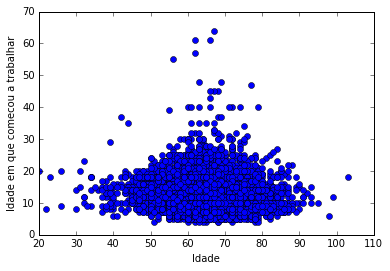

In [38]:
#filtrando aposentados que trabalham
aposentados_idade = pnad2014[(pnad2014.Aposentado == 'Sim')&(pnad2014.Trabalhou == 'Sim')].Idade
aposentados_idade_trabalhar = pnad2014[(pnad2014.Aposentado == 'Sim')&(pnad2014.Trabalhou == 'Sim')].Idade_começou_trabalhar
grafico = plt.plot(aposentados_idade, aposentados_idade_trabalhar, "o")
plt.xlabel('Idade')
plt.ylabel('Idade em que comecou a trabalhar')
plt.show()



In [39]:
#descritivo da idade dos aposentados que trabalham
aposentados_idade.describe()

count    8254.000000
mean       63.849649
std         8.110846
min        20.000000
25%        59.000000
50%        64.000000
75%        69.000000
max       103.000000
Name: Idade, dtype: float64

In [40]:
#descritivo da idade com que os aposentados que ainda trabalham comecaram a trabalhar
aposentados_idade_trabalhar.describe()

count    8254.000000
mean       12.811364
std         4.838295
min         4.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        64.000000
Name: Idade_começou_trabalhar, dtype: float64

In [35]:
#aposentados que trabalham por regiao
aposentados = [(pnad2014.Aposentado == 'Sim')&(pnad2014.Trabalhou == 'Sim')]
print('Tabela Cruzada Aposentados vs Regiao:')
crosstab_4 = pd.crosstab(aposentados,pnad2014.Região,margins=True,rownames=['Aposentados'], colnames=['Região'])
print(crosstab_4)

Tabela Cruzada Aposentados vs Regiao:
Região         Sul  Sudeste  Centro-Oeste  Nordeste  Norte     All
Aposentados                                                       
False        53583   103925         37257    102456  57152  354373
True          2023     2610           600      2304    717    8254
All          55606   106535         37857    104760  57869  362627


___
## Conclusão 

Com base nos gráficos e nas tabelas acima podemos ver que tanto o número de aposentados quanto o número de aposentados que trabalham cresceram entre 1992 e 2001 e entre 2001 e 2014. Podemos ver que a região que mais sobrecarrega o sistema previdenciário é a região sudeste, seguida pela nordeste e pela sul. Também podemos notar a partir do gráfico de dispersão que tem muita gente se aposentando ainda no períiodo ativo, o que bate com o artigo apresentado na introdução e é um problema que deve ser pensado pros próximos anos.